In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', 500)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics


In [5]:
# read the data
df=pd.read_csv('project_raw_data.csv')
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [6]:
# check shape and size of the data
df.shape
df.size

(14249, 10)

142490

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


## Data Cleaning

In [8]:
# check on missing data
df.isnull().sum()
df.isnull().sum()/df.shape[0]*100

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

avg_monthly_hrs       0.000000
department            4.975788
filed_complaint      85.556881
last_evaluation      10.751632
n_projects            0.000000
recently_promoted    97.894589
salary                0.000000
satisfaction          1.270265
status                0.000000
tenure                1.270265
dtype: float64

In [9]:
# replace missing values in filed_complaint in past 3-months with 0

df['filed_complaint'].value_counts()
df['filed_complaint'].unique()
df['filed_complaint']=np.where(df['filed_complaint'].isnull(),0,df['filed_complaint'])
df['filed_complaint'].value_counts()

1.0    2058
Name: filed_complaint, dtype: int64

array([nan,  1.])

0.0    12191
1.0     2058
Name: filed_complaint, dtype: int64

In [10]:
# replace missing values in recently_promoted with 0
df['recently_promoted'].value_counts()
df['recently_promoted'].unique()
df['recently_promoted']=np.where(df['recently_promoted'].isnull(),0,df['recently_promoted'])
df['recently_promoted'].value_counts()

1.0    300
Name: recently_promoted, dtype: int64

array([nan,  1.])

0.0    13949
1.0      300
Name: recently_promoted, dtype: int64

In [11]:
# check on missing data
df.isnull().sum()
df.isnull().sum()/df.shape[0]*100

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1532
n_projects              0
recently_promoted       0
salary                  0
satisfaction          181
status                  0
tenure                181
dtype: int64

avg_monthly_hrs       0.000000
department            4.975788
filed_complaint       0.000000
last_evaluation      10.751632
n_projects            0.000000
recently_promoted     0.000000
salary                0.000000
satisfaction          1.270265
status                0.000000
tenure                1.270265
dtype: float64

In [12]:
df['department'].value_counts()

sales                     3923
engineering               2592
support                   2122
IT                        1161
product                    860
marketing                  819
finance                    728
management                 595
information_technology     209
temp                       181
admin                      176
procurement                174
Name: department, dtype: int64

In [13]:
# drop missing department rows 
df.drop(index=df[df['department'].isnull()].index,inplace=True)
df.shape

(13540, 10)

In [14]:
# drop missing tenure and  satisfaction rows
len(df[df['tenure'].isnull() & df['satisfaction'].isnull()][['tenure','satisfaction']])

df=df[df['tenure'].notna() & df['satisfaction'].notna()]

181

In [15]:
df.isnull().sum()

avg_monthly_hrs         0
department              0
filed_complaint         0
last_evaluation      1284
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

In [16]:
df['department'].value_counts()
#we need to change information_technology to IT

df['department']=np.where(df['department']=='information_technology','IT',df['department'])

df['department'].value_counts()

sales                     3923
engineering               2592
support                   2122
IT                        1161
product                    860
marketing                  819
finance                    728
management                 595
information_technology     209
admin                      176
procurement                174
Name: department, dtype: int64

sales          3923
engineering    2592
support        2122
IT             1370
product         860
marketing       819
finance         728
management      595
admin           176
procurement     174
Name: department, dtype: int64

In [17]:
# impute last_evaluation missing values by department because believe evaluation criteria differs from department to another
a=df.groupby(by=['department'])['last_evaluation'].mean()
for i in a.index:
    filter1=df['last_evaluation'].isnull()
    filter2=df['department']==i
    if ((filter1) & (filter2)).sum()>0:
        df.loc[df[filter1 & filter2].index,'last_evaluation']=df.loc[df[filter1 & filter2].index,'last_evaluation'].fillna(value=a[i])
        
        
    
        

In [18]:
df.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
dtype: int64

## Exploratory Data Analysis

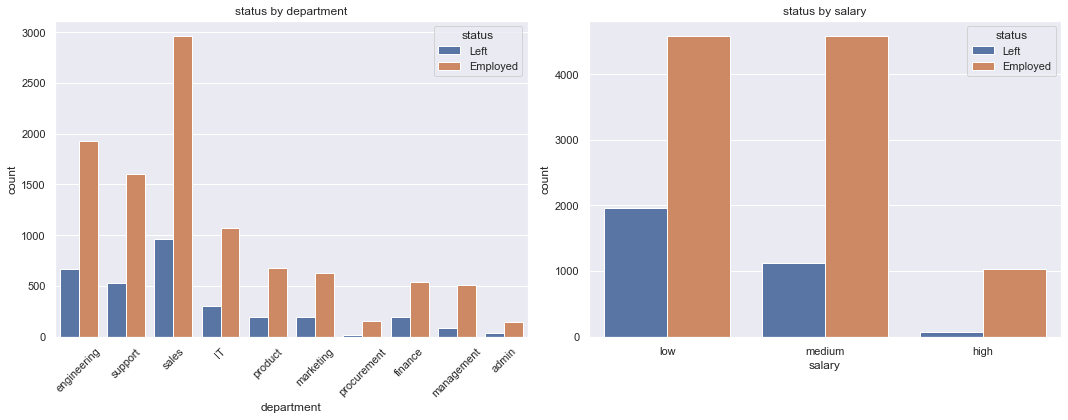

In [19]:
# explore leavers by department
fig=plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x='department',hue='status',data=df)
plt.xticks(rotation=45)
plt.title('status by department')

plt.subplot(1,2,2)
sns.countplot(x='salary',hue='status',data=df)

plt.title('status by salary')
plt.tight_layout()
plt.show();



,department,% of leavers
7,finance,26.785714
0,engineering,25.501543
1,support,24.646560
2,sales,24.471068
5,marketing,23.809524
4,product,21.976744
3,IT,21.897810
9,admin,19.886364
8,management,14.621849
6,procurement,9.195402


<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='department', ylabel='% of leavers'>

Text(0.5, 1.0, '% of leavers by department')

Text(0, 0.5, '% of leavers')

Text(0.5, 0, 'department')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'finance'),
  Text(1, 0, 'engineering'),
  Text(2, 0, 'support'),
  Text(3, 0, 'sales'),
  Text(4, 0, 'marketing'),
  Text(5, 0, 'product'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'admin'),
  Text(8, 0, 'management'),
  Text(9, 0, 'procurement')])

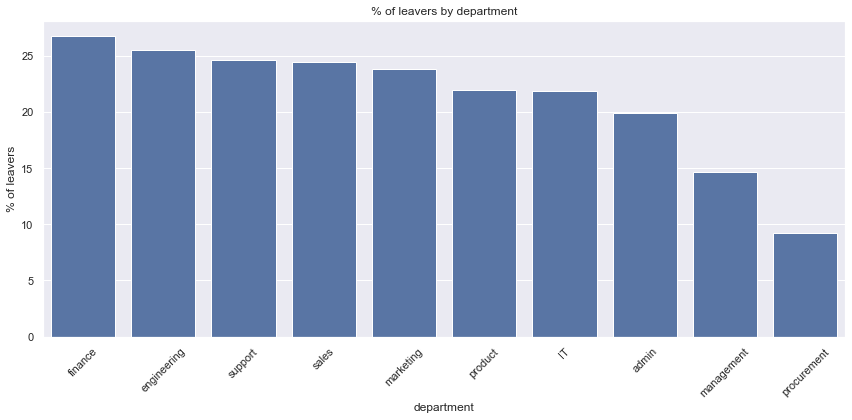

In [20]:
# explore leavers by department
department_df=pd.DataFrame(columns=['department','% of leavers'])
i=0
for value in df['department'].dropna().unique():
    ratio=df[(df['department']==value) & (df['status']=='Left') ].shape[0] / df[(df['department']==value)].shape[0]
    department_df.loc[i]=(value,ratio*100)
    i+=1


department_df.sort_values(by='% of leavers',ascending=False,inplace=True)
department_df
plt.figure(figsize=(12,6))
sns.barplot(data=department_df,x='department',y='% of leavers',color='b')
plt.title('% of leavers by department')
plt.ylabel('% of leavers')
plt.xlabel('department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
       
    

,salary,% of leavers
0,low,29.932804
1,medium,19.761946
2,high,6.557377


<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='salary', ylabel='% of leavers'>

Text(0.5, 1.0, '% of leavers by salary')

Text(0, 0.5, '% of leavers')

Text(0.5, 0, 'salary')

(array([0, 1, 2]),
 [Text(0, 0, 'low'), Text(1, 0, 'medium'), Text(2, 0, 'high')])

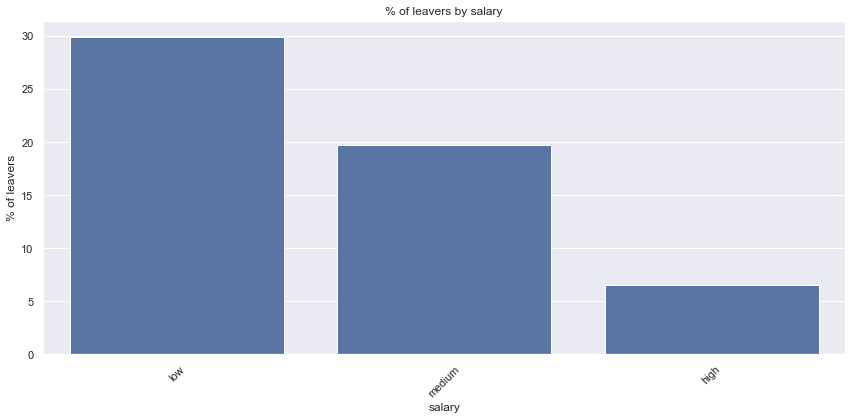

In [21]:
# explore leavers by salary
salary_df=pd.DataFrame(columns=['salary','% of leavers'])
i=0
for value in df['salary'].dropna().unique():
    ratio=df[(df['salary']==value) & (df['status']=='Left') ].shape[0] / df[(df['salary']==value)].shape[0]
    salary_df.loc[i]=(value,ratio*100)
    i+=1


salary_df.sort_values(by='% of leavers',ascending=False,inplace=True)
salary_df
plt.figure(figsize=(12,6))
sns.barplot(data=salary_df,x='salary',y='% of leavers',color='b')
plt.title('% of leavers by salary')
plt.ylabel('% of leavers')
plt.xlabel('salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
  

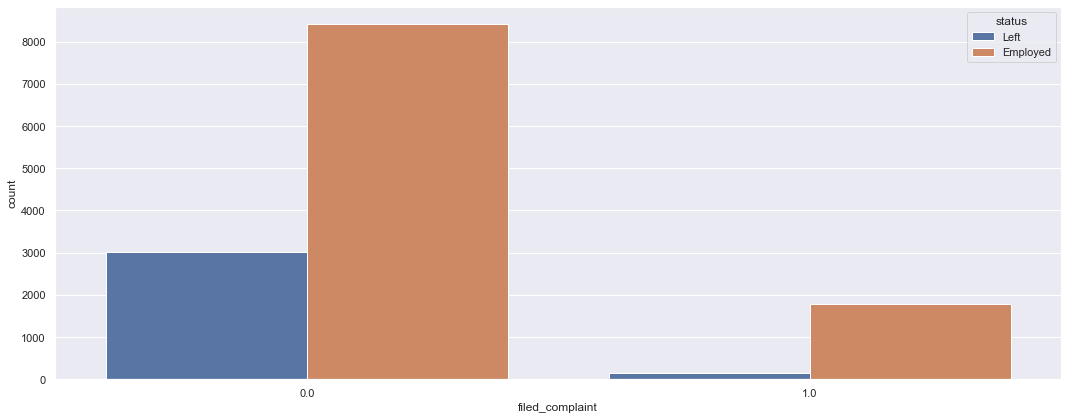

In [22]:
# explore leavers by filed_complaint
fig=plt.figure(figsize=(15,6))

sns.countplot(x='filed_complaint',hue='status',data=df)
plt.tight_layout()
plt.show();

,filed_complaint,% of leavers
0,0.0,26.389983
1,1.0,7.585139


<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='filed_complaint', ylabel='% of leavers'>

Text(0.5, 1.0, '% of leavers by complaint')

Text(0, 0.5, '% of leavers')

Text(0.5, 0, 'filed_complaint')

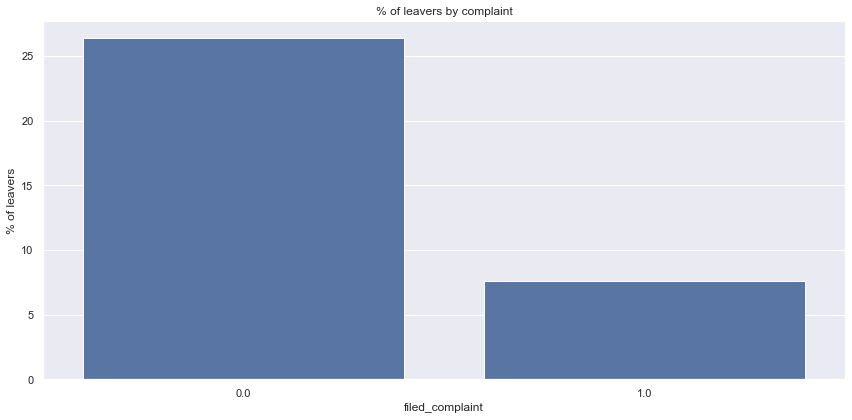

In [23]:

# explore leavers by filed_complaint
complaint_df=pd.DataFrame(columns=['filed_complaint','% of leavers'])
i=0
for value in df['filed_complaint'].dropna().unique():
    ratio=df[(df['filed_complaint']==value) & (df['status']=='Left') ].shape[0] / df[(df['filed_complaint']==value)].shape[0]
    complaint_df.loc[i]=(value,ratio*100)
    i+=1


complaint_df.sort_values(by='% of leavers',ascending=False,inplace=True)
complaint_df
plt.figure(figsize=(12,6))
sns.barplot(data=complaint_df,x='filed_complaint',y='% of leavers',color='b')
plt.title('% of leavers by complaint')
plt.ylabel('% of leavers')
plt.xlabel('filed_complaint')

plt.tight_layout()
plt.show()

status,Employed,Left,All
recently_promoted,,,
0.0,9931,3143,13074
1.0,267,18,285
All,10198,3161,13359


<AxesSubplot:xlabel='recently_promoted', ylabel='count'>

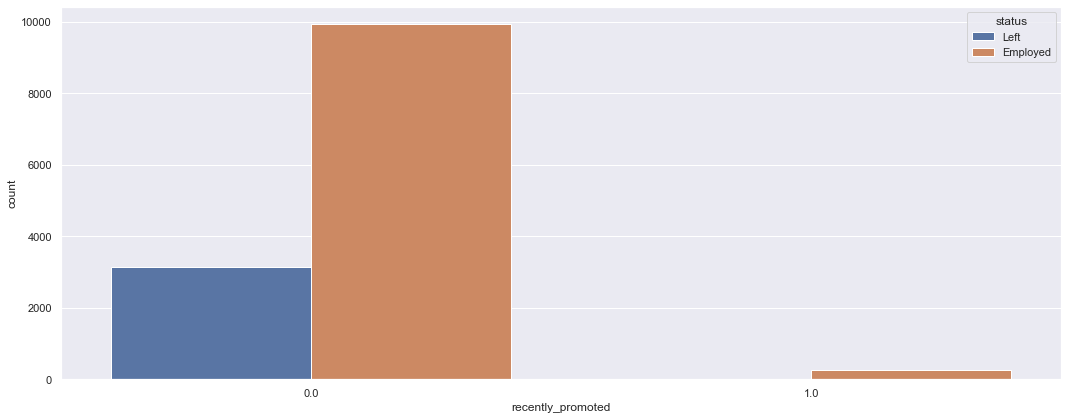

In [24]:
# explore leavers by recently_promoted
df.pivot_table(index='recently_promoted',columns='status',aggfunc='count',values='department',margins=True)
fig=plt.figure(figsize=(15,6))

sns.countplot(x='recently_promoted',hue='status',data=df)
plt.tight_layout()
plt.show()

,recently_promoted,% of leavers
0,0.0,24.040080
1,1.0,6.315789


<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='recently_promoted', ylabel='% of leavers'>

Text(0.5, 1.0, '% of leavers by promotion')

Text(0, 0.5, '% of leavers')

Text(0.5, 0, 'recently_promoted')

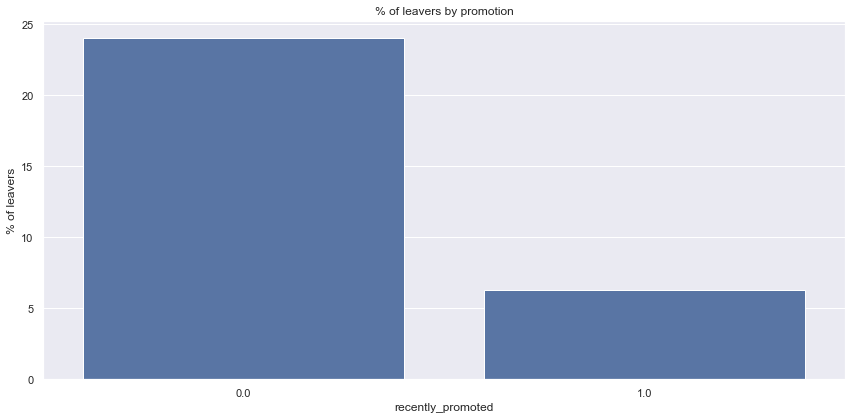

In [25]:
# explore leavers by recently_promoted
promoted_df=pd.DataFrame(columns=['recently_promoted','% of leavers'])
i=0
for value in df['recently_promoted'].dropna().unique():
    ratio=df[(df['recently_promoted']==value) & (df['status']=='Left') ].shape[0] / df[(df['recently_promoted']==value)].shape[0]
    promoted_df.loc[i]=(value,ratio*100)
    i+=1


promoted_df.sort_values(by='% of leavers',ascending=False,inplace=True)
promoted_df
plt.figure(figsize=(12,6))
sns.barplot(data=promoted_df,x='recently_promoted',y='% of leavers',color='b')
plt.title('% of leavers by promotion')
plt.ylabel('% of leavers')
plt.xlabel('recently_promoted')

plt.tight_layout()
plt.show()

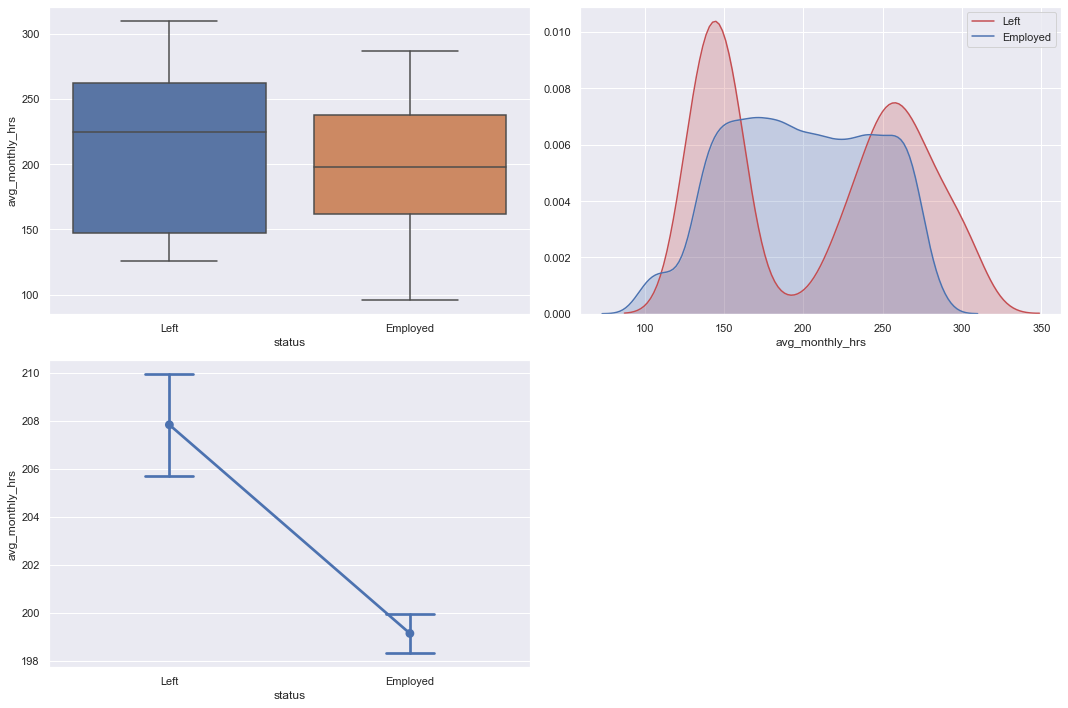

In [26]:
fig=plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(data=df,x='status',y='avg_monthly_hrs')
plt.subplot(2,2,2)
sns.kdeplot(df[df['status']=='Left']['avg_monthly_hrs'],shade=True,label='Left',color='r')

sns.kdeplot(df[df['status']!='Left']['avg_monthly_hrs'],shade=True,label='Employed')
plt.xlabel('avg_monthly_hrs')
plt.subplot(2,2,3)
sns.pointplot(data=df,x='status',y='avg_monthly_hrs',estimator=np.mean,capsize=0.2)
plt.tight_layout()
plt.show();

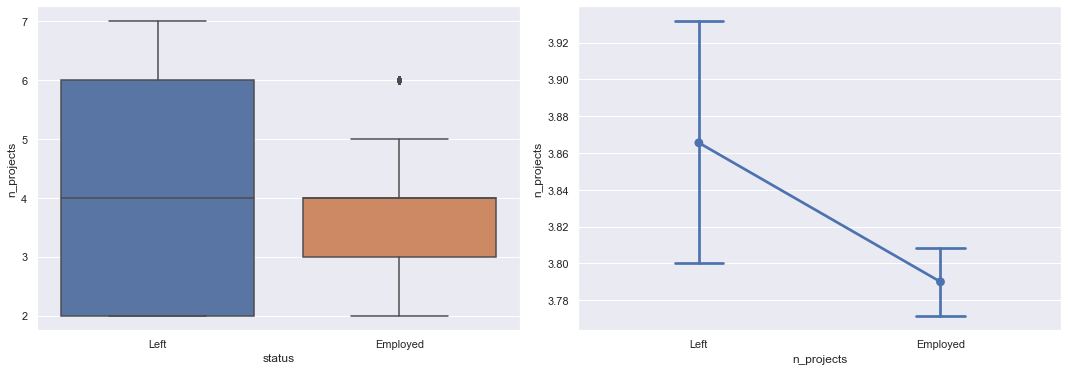

In [27]:
fig=plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(data=df,x='status',y='n_projects')

plt.subplot(2,2,2)
sns.pointplot(data=df,x='status',y='n_projects',estimator=np.mean,capsize=0.2)
plt.xlabel('n_projects')
plt.tight_layout()
plt.show();

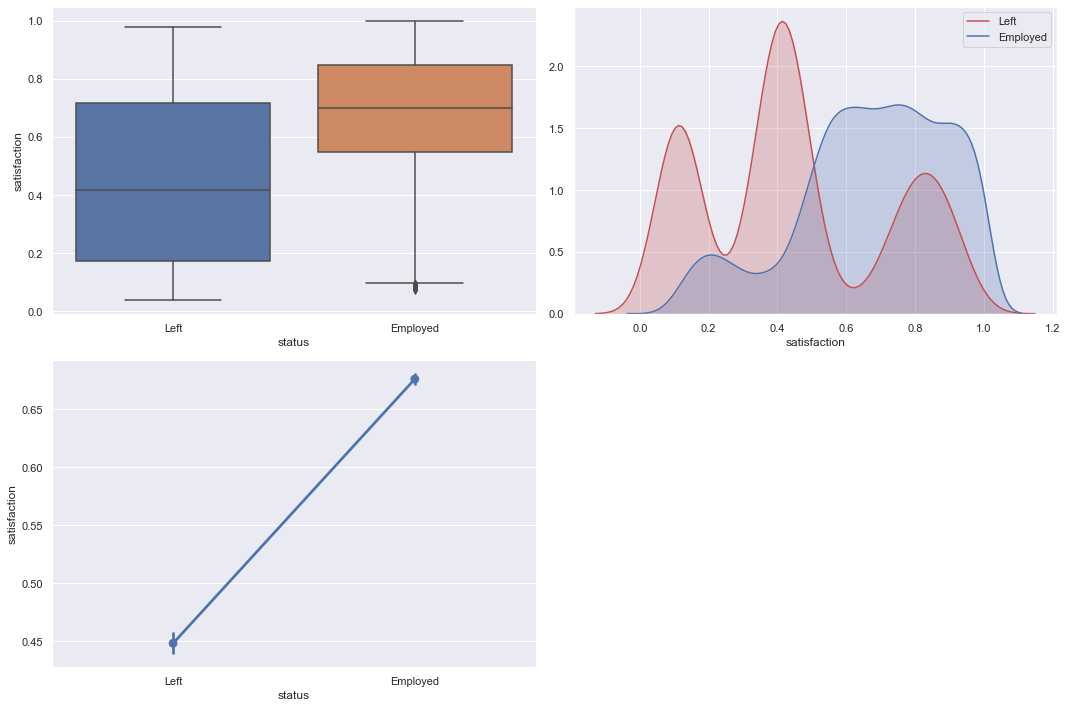

In [28]:
fig=plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(data=df,x='status',y='satisfaction')
plt.subplot(2,2,2)
sns.kdeplot(df[df['status']=='Left']['satisfaction'],shade=True,label='Left',color='r')

sns.kdeplot(df[df['status']!='Left']['satisfaction'],shade=True,label='Employed')
plt.xlabel('satisfaction')
plt.subplot(2,2,3)
sns.pointplot(data=df,x='status',y='satisfaction',estimator=np.mean)
plt.xlabel('status')
plt.tight_layout()
plt.show();

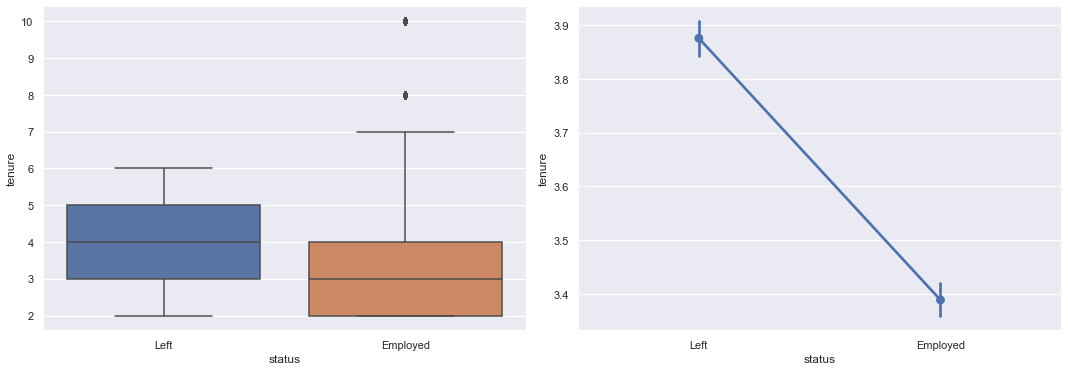

In [29]:
fig=plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(data=df,x='status',y='tenure')

plt.subplot(2,2,2)
sns.pointplot(data=df,x='status',y='tenure',estimator=np.mean)
plt.xlabel('status')
plt.tight_layout()
plt.show();

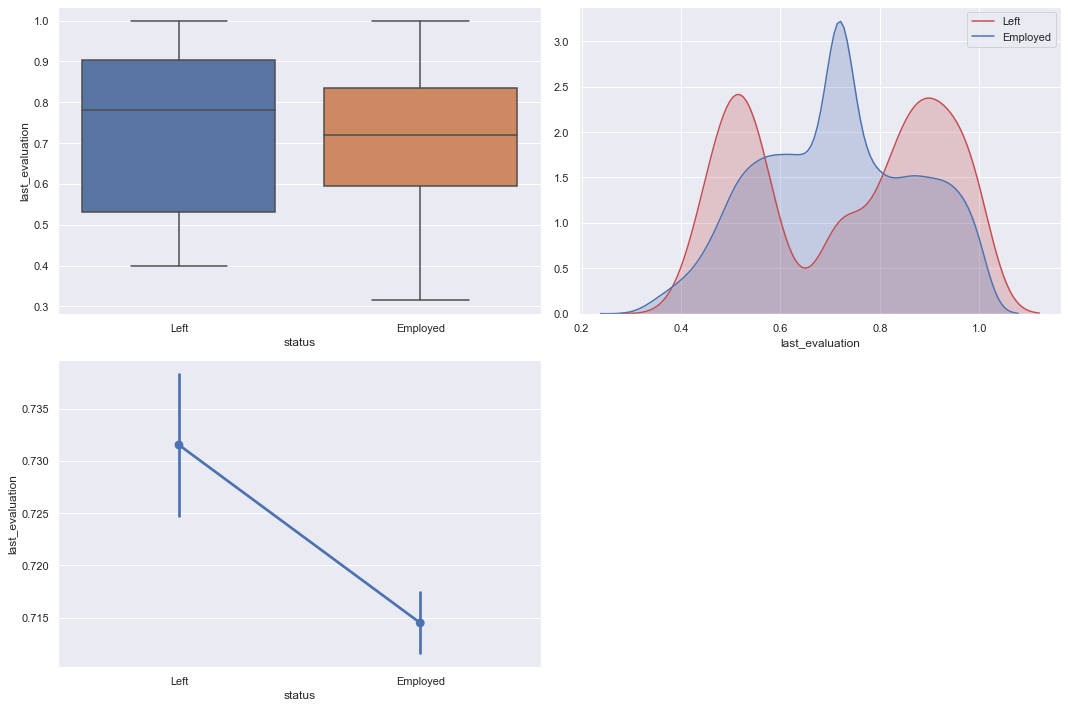

In [30]:
fig=plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(data=df,x='status',y='last_evaluation')
plt.subplot(2,2,2)
sns.kdeplot(df[df['status']=='Left']['last_evaluation'],shade=True,label='Left',color='r')

sns.kdeplot(df[df['status']!='Left']['last_evaluation'],shade=True,label='Employed')
plt.xlabel('last_evaluation')
plt.subplot(2,2,3)
sns.pointplot(data=df,x='status',y='last_evaluation',estimator=np.mean)
plt.xlabel('status')
plt.tight_layout()
plt.show();

tenure
2.0     3.698270
3.0     3.333973
4.0     4.632385
5.0     4.510393
6.0     4.229535
7.0     3.840659
8.0     3.771812
10.0    3.670000
Name: n_projects, dtype: float64

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='tenure', ylabel='n_projects'>

Text(0.5, 0, 'tenure')

Text(0, 0.5, 'avg # of projects')

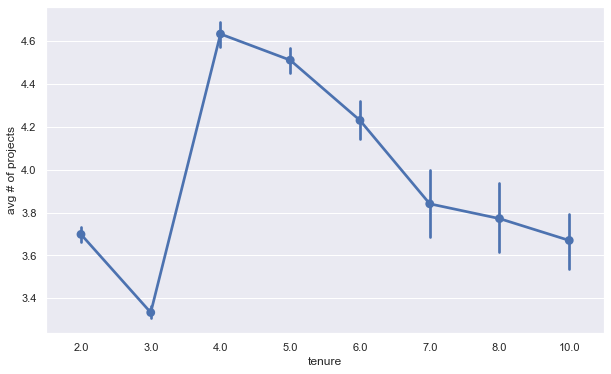

In [31]:
# relationship between tenure and number of projects
a=df.groupby(by=['tenure'])['n_projects'].mean()
a
plt.figure(figsize=(10,6))

sns.pointplot(data=df,x='tenure',y='n_projects',estimator=np.mean)
plt.xlabel('tenure')
plt.ylabel('avg # of projects')
plt.show()

In [32]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0
1,232,support,0.0,0.723200,3,0.0,low,0.834544,Employed,2.0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0


<Figure size 936x504 with 0 Axes>

<AxesSubplot:xlabel='salary', ylabel='satisfaction'>

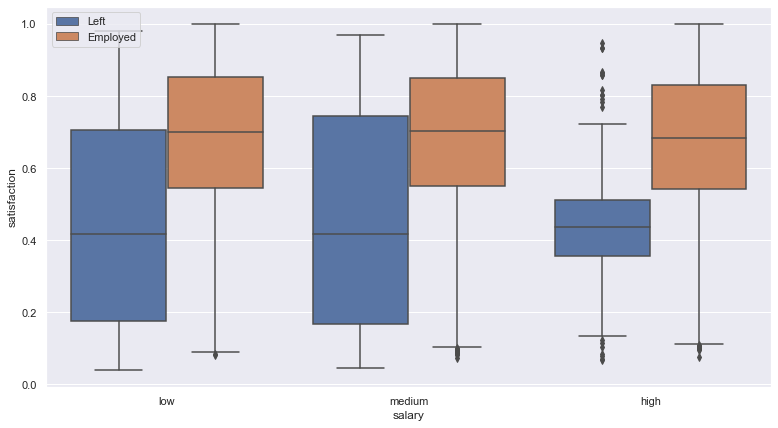

In [33]:
plt.figure(figsize=(13,7))
sns.boxplot(data=df,x='salary',y='satisfaction',hue='status')
plt.legend(loc='upper left')

# data preprocessing

In [160]:
# map target variable (status) to binary 

In [36]:
df_2=df.copy()
df_2['status']=df_2['status'].map({'Left':1,'Employed':0})
df_2.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,1,5.0
1,232,support,0.0,0.723200,3,0.0,low,0.834544,0,2.0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,0,3.0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,0,2.0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,0,3.0


In [159]:
# convert salary variable from categorical to ordinal

In [37]:
df_2['salary']=df_2['salary'].map({'low':1,'medium':2,'high':3})

In [38]:
df_2['salary'].value_counts()

1    6548
2    5713
3    1098
Name: salary, dtype: int64

<Figure size 1400x700 with 0 Axes>

<AxesSubplot:>

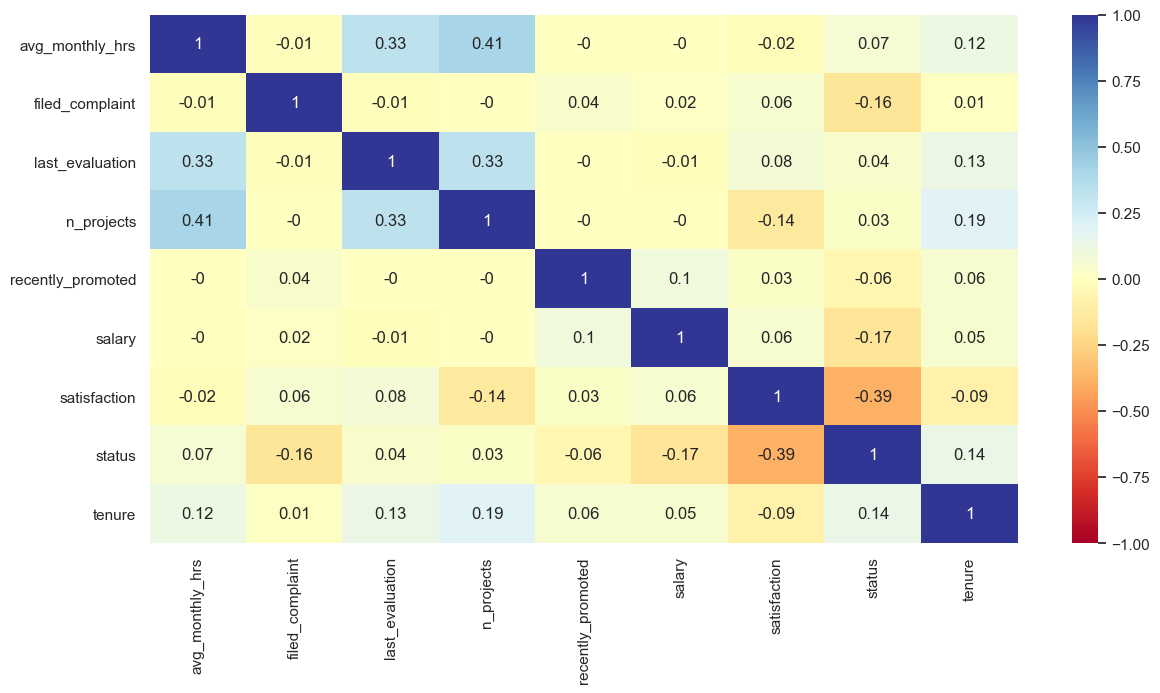

In [39]:
plt.figure(figsize=(14,7),dpi=100)
sns.heatmap(np.round(df_2.corr(),2), annot = True,vmin=-1,vmax=1,center=0,cmap='RdYlBu')
plt.show()

In [41]:
y=df_2.pop('status')
X=df_2

In [42]:
y

0        1
1        0
2        0
3        0
4        0
        ..
14243    0
14244    0
14245    0
14246    1
14247    0
Name: status, Length: 13359, dtype: int64

In [161]:
# create dummies for department 

In [44]:
X=pd.get_dummies(df_2,columns=['department'],drop_first=True)
X

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,department_admin,department_engineering,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support
0,221,0.0,0.932868,4,0.0,1,0.829896,5.0,0,1,0,0,0,0,0,0,0
1,232,0.0,0.723200,3,0.0,1,0.834544,2.0,0,0,0,0,0,0,0,0,1
2,184,0.0,0.788830,3,0.0,2,0.834988,3.0,0,0,0,0,0,0,0,1,0
3,206,0.0,0.575688,4,0.0,1,0.424764,2.0,0,0,0,0,0,0,0,1,0
4,249,0.0,0.845217,3,0.0,1,0.779043,3.0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14243,272,0.0,0.815504,4,0.0,1,0.693387,2.0,0,1,0,0,0,0,0,0,0
14244,178,0.0,0.735865,5,0.0,1,0.263282,5.0,0,0,0,0,0,0,0,0,0
14245,257,0.0,0.638604,3,0.0,1,0.868209,2.0,0,0,0,0,0,0,0,1,0
14246,232,1.0,0.847623,5,0.0,2,0.898917,5.0,0,0,1,0,0,0,0,0,0


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [162]:
# split data to train and test

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [47]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

0    0.763341
1    0.236659
Name: status, dtype: float64

0    0.763473
1    0.236527
Name: status, dtype: float64

In [163]:
# scaling independent variables

In [48]:
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
       
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        

## Logistic Regression

In [62]:
from sklearn.model_selection import GridSearchCV

scorers = ['precision','recall','accuracy','roc_auc','f1']
balance = [ {0:1,1:1}, {0:1,1:10}, {0:1,1:50},{0:1,1:100}]
grid={"C":np.logspace(-4, 4, 50), "penalty":["l1","l2"],'solver':['liblinear','lbfgs'],"class_weight":['balanced',balance]}# l1 lasso l2 ridge
logreg=LogisticRegression(random_state=42)
logreg_cv=GridSearchCV(logreg,grid,cv=5,scoring=scorers,refit='roc_auc')
logreg_cv.fit(X_train_sc,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.963623...
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'class_weight': ['balanced',
                                          [{0: 1, 1: 1}, {0: 1, 1: 10},
                                           {0: 1, 1: 50}, {0: 1, 1: 100}]],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             refit='roc_auc',
             scoring=['precision', 'recall', 'accuracy', 'ro

In [63]:
logreg_cv.best_score_

0.8264609567909968

In [64]:
logreg_cv.best_params_

{'C': 2.559547922699533,
 'class_weight': 'balanced',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [65]:
print_score(logreg_cv, X_train_sc, y_train, X_test_sc, y_test, train=True)
print_score(logreg_cv, X_train_sc, y_train, X_test_sc, y_test, train=False)

Train Result:
accuracy score: 0.7539

Classification Report: 
 	Precision: 0.48787210584343993
	Recall Score: 0.7998192498870311
	F1 score: 0.6060606060606061

Confusion Matrix: 
 [[5280 1858]
 [ 443 1770]]

Test Result:
accuracy score: 0.7592315369261478

Classification Report: 
 	Precision: 0.4943371085942705
	Recall Score: 0.7827004219409283
	F1 score: 0.6059616169865251

Confusion Matrix: 
 [[2301  759]
 [ 206  742]]



In [66]:
from sklearn import metrics
y_pred_prob=logreg_cv.predict_proba(X_test_sc)[:,1]
fpr,tpr,thr=metrics.roc_curve(y_test,y_pred_prob)

In [67]:
logreg_cv_auc=metrics.roc_auc_score(y_test,y_pred_prob)
logreg_cv_auc

0.8327259314414935

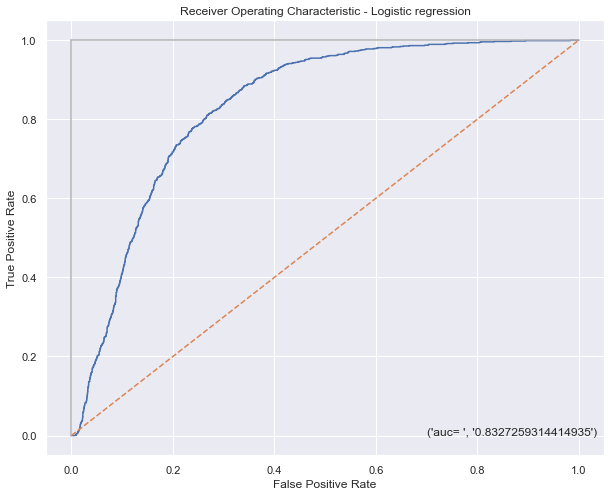

In [68]:
plt.subplots(1, figsize=(10,8))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.text(0.7,0,('auc= ',str(logreg_cv_auc)))
plt.show();

## Support Vector Machine

In [70]:
from sklearn import svm

In [71]:
balance = [ {0:1,1:1}, {0:1,1:10}, {0:1,1:50},{0:1,1:100}]
param_grid = {'C': [0.1,1,5, 10,50, 100,500],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf'],
             'class_weight':['balanced',balance]}
scorers = ['precision','recall','accuracy','f1','roc_auc']



svm_grid = GridSearchCV(svm.SVC(random_state=42,probability=True), param_grid,cv=5,scoring=scorers,refit='roc_auc')

svm_grid.fit(X_train_sc, y_train) 

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
             param_grid={'C': [0.1, 1, 5, 10, 50, 100, 500],
                         'class_weight': ['balanced',
                                          [{0: 1, 1: 1}, {0: 1, 1: 10},
                                           {0: 1, 1: 50}, {0: 1, 1: 100}]],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             refit='roc_auc',
             scoring=['precision', 'recall', 'accuracy', 'f1', 'roc_auc'])

In [72]:
svm_grid.best_score_

0.9782029520145453

In [73]:
svm_grid.best_params_

{'C': 1, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'rbf'}

In [74]:
print_score(svm_grid, X_train_sc, y_train, X_test_sc, y_test, train=True)
print_score(svm_grid, X_train_sc, y_train, X_test_sc, y_test, train=False)

Train Result:
accuracy score: 0.9899

Classification Report: 
 	Precision: 0.9669457910973998
	Recall Score: 0.991414369633981
	F1 score: 0.9790272199910754

Confusion Matrix: 
 [[7063   75]
 [  19 2194]]

Test Result:
accuracy score: 0.9673153692614771

Classification Report: 
 	Precision: 0.9378349410503751
	Recall Score: 0.9229957805907173
	F1 score: 0.9303561935140883

Confusion Matrix: 
 [[3002   58]
 [  73  875]]



In [75]:
y_pred_prob=svm_grid.predict_proba(X_test_sc)[:,1]
fpr,tpr,thr=metrics.roc_curve(y_test,y_pred_prob)
svm_grid_auc=metrics.roc_auc_score(y_test,y_pred_prob)
svm_grid_auc

0.9818165522186372

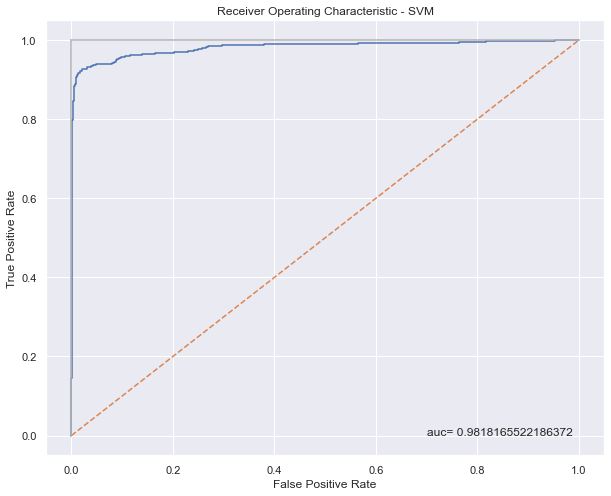

In [76]:
plt.subplots(1, figsize=(10,8))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.text(0.7,0,'auc= '+str(svm_grid_auc))
plt.show();

## Decision Tree Classifier

In [78]:
from sklearn.model_selection import GridSearchCV

score=['precision','recall','accuracy','f1','roc_auc'] 
balance = [ {0:1,1:1}, {0:1,1:10}, {0:1,1:50},{0:1,1:100}]
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4,6], 
    "min_samples_leaf":list(range(1, 20)),
    'class_weight':['balanced',balance]
}


tree_model = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_model, params, scoring=score, n_jobs=-1, verbose=1,refit='roc_auc',cv=5)
tree_cv.fit(X_train_sc,y_train)

Fitting 5 folds for each of 11552 candidates, totalling 57760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 1644 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 3044 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 4844 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7044 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 9644 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 12644 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 16044 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 19844 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 24044 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 28644 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 38308 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 49108 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 57760 out

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced',
                                          [{0: 1, 1: 1}, {0: 1, 1: 10},
                                           {0: 1, 1: 50}, {0: 1, 1: 100}]],
                         'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4, 6],
                         'splitter': ('best', 'random')},
             refit='roc_auc',
             scoring=['precision', 'recall', 'accuracy', 'f1', 'roc_auc'],
             verbose=1)

In [79]:
tree_cv.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 18,
 'min_samples_split': 2,
 'splitter': 'best'}

In [80]:
tree_cv.best_score_

0.9783838509782005

In [81]:
print_score(tree_cv, X_train_sc, y_train, X_test_sc, y_test, train=True)
print_score(tree_cv, X_train_sc, y_train, X_test_sc, y_test, train=False)

Train Result:
accuracy score: 0.9618

Classification Report: 
 	Precision: 0.8993115318416524
	Recall Score: 0.9444193402620876
	F1 score: 0.9213136433766806

Confusion Matrix: 
 [[6904  234]
 [ 123 2090]]

Test Result:
accuracy score: 0.9560878243512974

Classification Report: 
 	Precision: 0.8922764227642277
	Recall Score: 0.9261603375527426
	F1 score: 0.9089026915113871

Confusion Matrix: 
 [[2954  106]
 [  70  878]]



In [82]:
y_pred_prob=tree_cv.predict_proba(X_test_sc)[:,1]
fpr,tpr,thr=metrics.roc_curve(y_test,y_pred_prob)
tree_cv_auc=metrics.roc_auc_score(y_test,y_pred_prob)
tree_cv_auc

0.9811576142411957

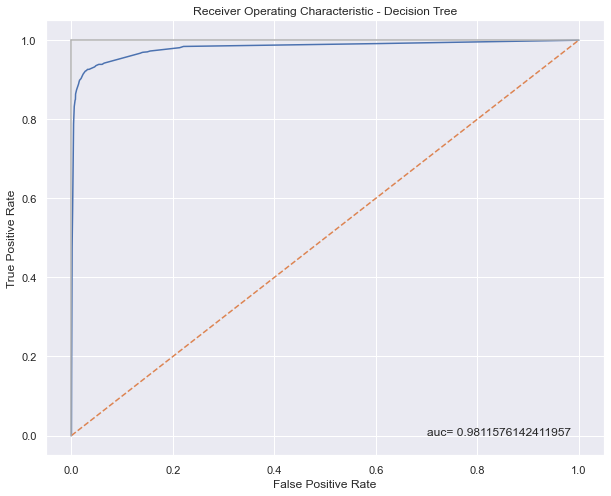

In [83]:
plt.subplots(1, figsize=(10,8))
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.text(0.7,0,'auc= '+str(tree_cv_auc))
plt.show();

## Random Forest Classifier

In [100]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=50)]
max_features = ['auto', 'sqrt']
max_depth = (list(range(1, 25)))

min_samples_split = (list(range(2, 11)))
min_samples_leaf = (list(range(1, 7)))
bootstrap = [True, False]
balance = [ {0:1,1:1}, {0:1,1:10}, {0:1,1:50},{0:1,1:100}]
criterion=["gini", "entropy"]


random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap,'class_weight':['balanced',balance],
              'criterion':criterion}
score=['precision','recall','accuracy','f1','roc_auc'] 
rand_forest = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rand_forest, param_distributions=random_grid, n_iter=400, cv=5, 
                               verbose=1, random_state=42, n_jobs=-1,refit='roc_auc',scoring=score)


rf_cv.fit(X_train_sc, y_train)


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 1258 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 1808 tasks      | elapsed: 64.0min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 68.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=400, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         [{0: 1, 1: 1},
                                                          {0: 1, 1: 10},
                                                          {0: 1, 1: 50},
                                                          {0: 1, 1: 100}]],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24],
                                        'max_features': ['auto', 'sqrt'],

In [101]:
rf_cv.best_params_

{'n_estimators': 375,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 14,
 'criterion': 'entropy',
 'class_weight': 'balanced',
 'bootstrap': False}

In [102]:
rf_cv.best_score_

0.9901351299734312

In [103]:
print_score(rf_cv, X_train_sc, y_train, X_test_sc, y_test, train=True)
print_score(rf_cv, X_train_sc, y_train, X_test_sc, y_test, train=False)

Train Result:
accuracy score: 0.9957

Classification Report: 
 	Precision: 0.9891940567312022
	Recall Score: 0.9927699954812472
	F1 score: 0.9909788001804241

Confusion Matrix: 
 [[7114   24]
 [  16 2197]]

Test Result:
accuracy score: 0.9802894211576846

Classification Report: 
 	Precision: 0.9833147942157954
	Recall Score: 0.9324894514767933
	F1 score: 0.9572279371954522

Confusion Matrix: 
 [[3045   15]
 [  64  884]]



In [104]:
y_pred_prob=rf_cv.predict_proba(X_test_sc)[:,1]
fpr,tpr,thr=metrics.roc_curve(y_test,y_pred_prob)
rf_cv_auc=metrics.roc_auc_score(y_test,y_pred_prob)
rf_cv_auc

0.9897579355230137

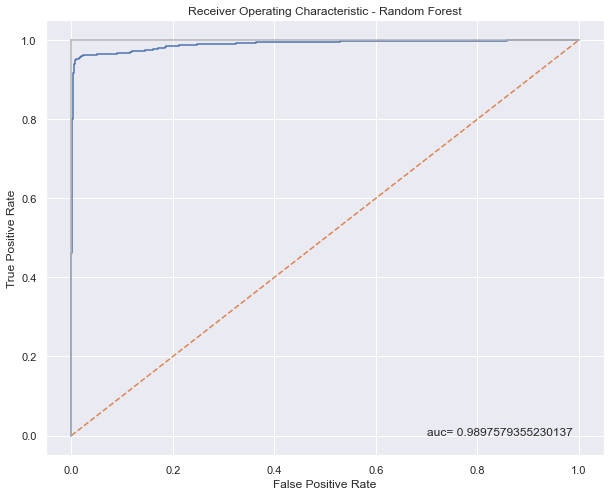

In [105]:
plt.subplots(1, figsize=(10,8))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.text(0.7,0,'auc= '+str(rf_cv_auc))
plt.show();

## Gradient Boosting

In [126]:


score=['precision','recall','accuracy','f1','roc_auc'] 

params = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "min_samples_split": [4,6,8,10],
  
    "max_depth":(list(range(1, 11))),
    "max_features":['sqrt','None'],
    "subsample":[0.5,0.8,0.9, 1.0],
    "n_estimators":[100,200]
    }

GB_model = GradientBoostingClassifier(random_state=42)
GB_cv = GridSearchCV(GB_model, params, scoring=score, n_jobs=-1, verbose=1,refit='roc_auc',cv=5)
GB_cv.fit(X_train_sc,y_train)

Fitting 5 folds for each of 2560 candidates, totalling 12800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 1324 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 2998 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 4632 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 6065 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 7864 tasks      | elapsed: 53.8min
[Parallel(n_jobs=-1)]: Done 9746 tasks      | elapsed: 72.7min
[Parallel(n_jobs=-1)]: Done 12296 tasks      | elapsed: 90.0min
[Parallel(n_jobs=-1)]: Done 12800 out of 12800 | elapsed: 96.1min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'loss': ['deviance'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'None'],
                         'min_samples_split': [4, 6, 8, 10],
                         'n_estimators': [100, 200],
                         'subsample': [0.5, 0.8, 0.9, 1.0]},
             refit='roc_auc',
             scoring=['precision', 'recall', 'accuracy', 'f1', 'roc_auc'],
             verbose=1)

In [127]:
GB_cv.best_params_

{'learning_rate': 0.05,
 'loss': 'deviance',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_split': 6,
 'n_estimators': 200,
 'subsample': 1.0}

In [128]:
GB_cv.best_score_

0.9902428485764909

In [129]:
print_score(GB_cv, X_train_sc, y_train, X_test_sc, y_test, train=True)
print_score(GB_cv, X_train_sc, y_train, X_test_sc, y_test, train=False)

Train Result:
accuracy score: 0.9958

Classification Report: 
 	Precision: 0.9949908925318761
	Recall Score: 0.9873474920921825
	F1 score: 0.9911544567929235

Confusion Matrix: 
 [[7127   11]
 [  28 2185]]

Test Result:
accuracy score: 0.9782934131736527

Classification Report: 
 	Precision: 0.9831649831649831
	Recall Score: 0.9240506329113924
	F1 score: 0.9526916802610115

Confusion Matrix: 
 [[3045   15]
 [  72  876]]



In [166]:
y_pred_prob=GB_cv.predict_proba(X_test_sc)[:,1]
fpr,tpr,thr=metrics.roc_curve(y_test,y_pred_prob)
GB_cv_auc=metrics.roc_auc_score(y_test,y_pred_prob)
GB_cv_auc

0.9899468437163895

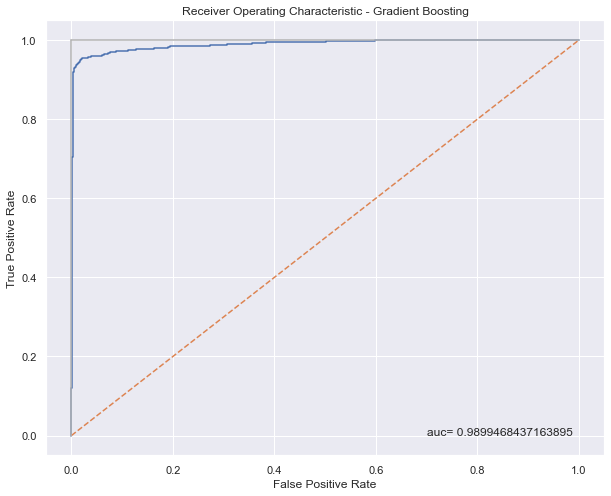

In [167]:
plt.subplots(1, figsize=(10,8))
plt.title('Receiver Operating Characteristic - Gradient Boosting')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.text(0.7,0,'auc= '+str(GB_cv_auc))
plt.show();

<AxesSubplot:>

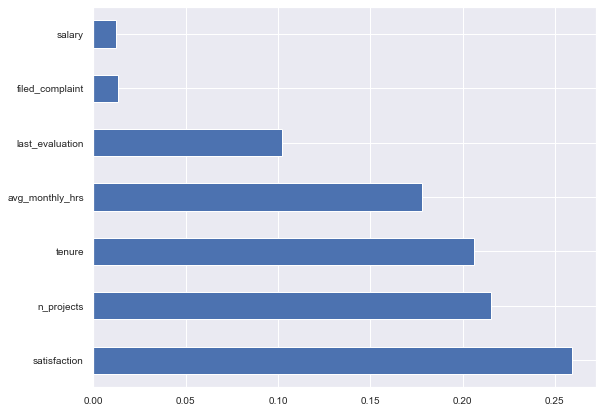

In [130]:
(pd.Series(GB_cv.best_estimator_.feature_importances_, index=X.columns)
   .nlargest(7)
   .plot(kind='barh',fontsize=10,figsize=(9,7),color='b'))

# compare models performance

In [164]:
#model performance on test data

In [149]:
Recall_score=[]
Accuracy_score=[]
F1_score=[]
AUC=[]
for model in (logreg_cv,svm_grid,tree_cv,rf_cv,GB_cv):
    pred= model.predict(X_test_sc)
    Accuracy_score.append(accuracy_score(y_test, pred))
    Recall_score.append(recall_score(y_test, pred))
    F1_score.append(f1_score(y_test, pred))
    pred_prob=model.predict_proba(X_test_sc)[:,1]
    fpr,tpr,thr=metrics.roc_curve(y_test,pred_prob)
    AUC.append(metrics.roc_auc_score(y_test,pred_prob))
model_eval_df=pd.DataFrame(data=[Recall_score,Accuracy_score,F1_score,AUC],
                          columns=['logistic','svm','decison_tree','random forest','Gradientboost'],index=['Recall',
                                'Accuracy','F1','AUC'])
    
    



In [150]:
model_eval_df

,logistic,svm,decison_tree,random forest,Gradientboost
Recall,0.782700,0.922996,0.926160,0.932489,0.924051
Accuracy,0.759232,0.967315,0.956088,0.980289,0.978293
F1,0.605962,0.930356,0.908903,0.957228,0.952692
AUC,0.832726,0.981817,0.981158,0.989758,0.989947


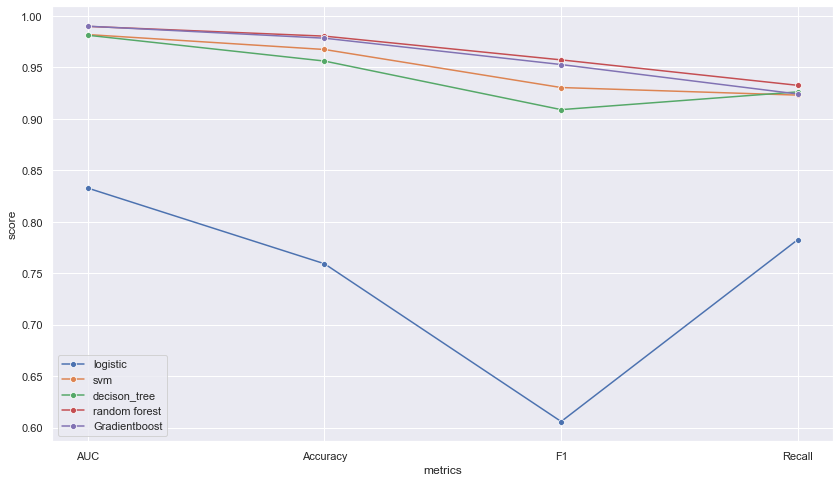

In [156]:
plt.figure(figsize=(14,8))
sns.lineplot(x=model_eval_df.index.tolist(),y='logistic',data=model_eval_df,marker='o',label='logistic')
sns.lineplot(x=model_eval_df.index.tolist(),y='svm',data=model_eval_df,marker='o',label='svm')
sns.lineplot(x=model_eval_df.index.tolist(),y='decison_tree',data=model_eval_df,marker='o',label='decison_tree')
sns.lineplot(x=model_eval_df.index.tolist(),y='random forest',data=model_eval_df,marker='o',label='random forest')
sns.lineplot(x=model_eval_df.index.tolist(),y='Gradientboost',data=model_eval_df,marker='o',label='Gradientboost')
plt.legend()
plt.xlabel('metrics')
plt.ylabel('score')
plt.show();


In [165]:
# model performance on train data

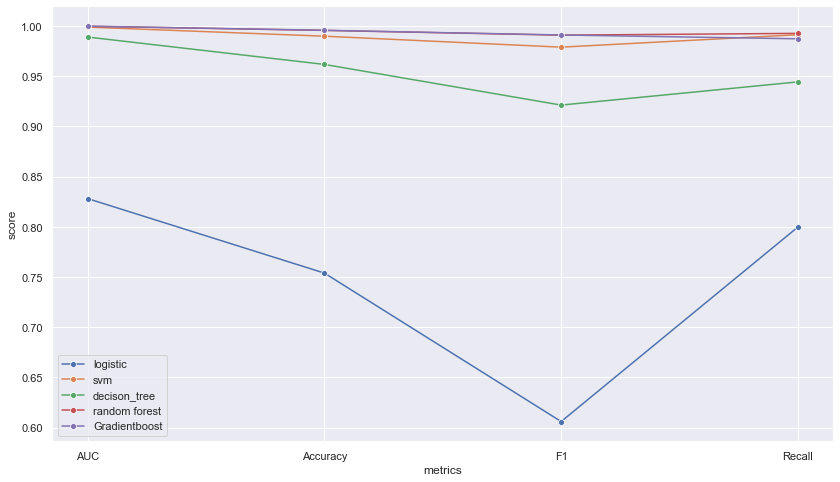

In [158]:
train_Recall_score=[]
train_Accuracy_score=[]
train_F1_score=[]
train_AUC=[]
for model in (logreg_cv,svm_grid,tree_cv,rf_cv,GB_cv):
    pred= model.predict(X_train_sc)
    train_Accuracy_score.append(accuracy_score(y_train, pred))
    train_Recall_score.append(recall_score(y_train, pred))
    train_F1_score.append(f1_score(y_train, pred))
    pred_prob=model.predict_proba(X_train_sc)[:,1]
    fpr,tpr,thr=metrics.roc_curve(y_train,pred_prob)
    train_AUC.append(metrics.roc_auc_score(y_train,pred_prob))
train_model_eval_df=pd.DataFrame(data=[train_Recall_score,train_Accuracy_score,train_F1_score,train_AUC],
                          columns=['logistic','svm','decison_tree','random forest','Gradientboost'],index=['Recall',
                                'Accuracy','F1','AUC'])
train_model_eval_df
plt.figure(figsize=(14,8))
sns.lineplot(x=model_eval_df.index.tolist(),y='logistic',data=train_model_eval_df,marker='o',label='logistic')
sns.lineplot(x=model_eval_df.index.tolist(),y='svm',data=train_model_eval_df,marker='o',label='svm')
sns.lineplot(x=model_eval_df.index.tolist(),y='decison_tree',data=train_model_eval_df,marker='o',label='decison_tree')
sns.lineplot(x=model_eval_df.index.tolist(),y='random forest',data=train_model_eval_df,marker='o',label='random forest')
sns.lineplot(x=model_eval_df.index.tolist(),y='Gradientboost',data=train_model_eval_df,marker='o',label='Gradientboost')
plt.legend()
plt.xlabel('metrics')
plt.ylabel('score')
plt.show();

In [ ]:
# from the model performance grapths, random forset is the best performing model on both train and test data